# 1.BoW (Bag of Words)
- 단어들의 순서는 전혀 고려하지 않고 출현 빈도에만 집중하는 텍스트데이터 수치화 방법
- 분류 문제나 여러 문서 간의 유사도를 구하는 문제에 주로 쓰입니다. 

## 1) BoW 예제

In [5]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
    # 온점 제거 및 형태소 분석
    document = document.replace('.', '')
    tokenized_document = okt.morphs(document)
    
    word_to_index = {}
    bow = []
    
    for word in tokenized_document:
        if word not in word_to_index.keys():
            word_to_index[word] = len(word_to_index)
            # BoW에 전부 기본값 1을 넣는다
            bow.insert(len(word_to_index)-1, 1)
        else:
            # 재등장하는 단어의 인덱스
            index = word_to_index.get(word)
            # 재등장하는 단어는 해당하는 인덱스의 위치에 1을 더함
            bow[index] = bow[index]+1
    return word_to_index, bow

In [6]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


예제2

In [7]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


문서2과 문서2 합쳐서 BoW 만들 수도 있음

In [8]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


여러 문서의 단어 집합을 합친 뒤에 해당 단어 집합에 대한 각 문서의 BoW를 구하기도 함
- ex 문서3에 대한 단어집합 기준으로 문서1,문서2의 BoW를 만드는 예제

## 2) CountVectorizer 클래스로 BoW 만들기

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도 수를 기록
print('bag of words vector:', vector.fit_transform(corpus).toarray())

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary:', vector.vocabulary_)

bag of words vector: [[1 1 2 1 2 1]]
vocabulary: {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [10]:
# 알파벳 I는 BoW를 만드는 과정에서 사라졌는데, 이는 CountVectorizer가 기본적으로 길이가 2이상인 문자에 대해서만 토큰으로 인식하기 때문
# 주의할 것은 CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하고 BoW를 만든다

## 3) 불용어를 제거한 BoW 만들기

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

### (1) 사용자가 직접 정의한 불용어 사용

In [12]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=['the', 'a', 'an', 'is', 'not'])
print('bag of words vector:', vect.fit_transform(text).toarray())
print('voca:', vect.vocabulary_)

bag of words vector: [[1 1 1 1 1]]
voca: {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


### (2) CountVectorizer에서 제공하는 자체 불용어 사용

In [13]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words='english')
print('bag of words vector:', vect.fit_transform(text).toarray())
print('voca', vect.vocabulary_)

bag of words vector: [[1 1 1]]
voca {'family': 0, 'important': 1, 'thing': 2}


### (3) NLTK에서 지원하는 불용어 사용

In [14]:
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words('english')
vect = CountVectorizer(stop_words = stop_words)
print('bag of words vector:', vect.fit_transform(text).toarray())
print('voca', vect.vocabulary_)

bag of words vector: [[1 1 1 1]]
voca {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


# 2. 문서단어행렬 DTM
- 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것
* 행과 열을 반대로 선택하면 TDM

In [15]:
# 데이터 다운로드
!pip install wget
# windows일 경우
import wget

wget.download('https://raw.githubusercontent.com/euphoris/datasets/master/imdb.xlsx')

100% [..............................................................................] 55772 / 55772

'imdb (1).xlsx'

In [18]:
# 데이터 열기 
import pandas as pd
df = pd.read_excel('imdb (1).xlsx', index_col=0)

In [19]:
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [22]:
df.shape

(748, 2)

#### TDM 만들기

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# max_features : 빈도순으로 최대 500단어까지 포함
# stop_words='english' : 불용어(관사, 전치사등을 제거)
cv = CountVectorizer(max_features=500, stop_words='english')

In [21]:
tdm = cv.fit_transform(df['review'])
tdm

<748x500 sparse matrix of type '<class 'numpy.int64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [23]:
tdm.shape

(748, 500)

단어목록

In [26]:
# 단어 목록을 볼때는 tdm이 아니라 cv에 저장되어 있음
cv.get_feature_names()[:10]

['10',
 '20',
 '90',
 'absolutely',
 'acted',
 'acting',
 'action',
 'actor',
 'actors',
 'actress']

In [25]:
len(cv.get_feature_names())

500

단어별 총 빈도

In [27]:
tdm.sum(axis=0) #열별 단어 수

matrix([[ 29,   3,   6,   9,   3,  43,   7,  10,  19,   3,   3,  10,   3,
           4,   3,   4,   9,   3,   3,   3,   6,   3,   4,   3,  13,   4,
           3,   5,   3,   8,   5,   3,  14,  71,   4,  11,   4,   6,   8,
          25,  18,  10,   5,  10,   4,   3,   4,  10,   3,   3,   6,   7,
           3,   4,  10,   5,   3,  18,   6,   8,  24,  35,   4,   3,   7,
           3,   4,   5,   8,  10,   6,   5,   5,   7,   4,   3,   3,   5,
           3,   3,   4,   4,   7,   4,   5,   3,   4,   6,   4,   3,   5,
           4,   3,   5,   4,   3,   9,   3,   4,   3,  13,  11,  22,   5,
           3,   9,   5,  12,   6,   3,   9,  12,  26,   4,  10,   3,   3,
           3,   3,   4,   4,   3,   6,   3,   9,  11,  11,   4,   5,   3,
           9,   4,   6,   3,   8,   3,   3,  16,   4,   7,   4,   4,   5,
           8,   5,   7,   5,   7,   5,   3,   3,  10,   5, 163,  24,   3,
           3,   5,   6,   4,   5,  19,   3,   9,   3,   7,   5,   3,   4,
           3,   6,   3,   7,   3,   6,

In [ ]:
tdm.sum(axis=1) # 행별 단어 수

In [28]:
word_count = pd.DataFrame({
    '단어':cv.get_feature_names(),
    '빈도':tdm.sum(axis=0).flat
})

In [29]:
type(tdm.sum(axis=0))

numpy.matrix

In [30]:
word_count

,단어,빈도
0,10,29
1,20,3
2,90,6
3,absolutely,9
4,acted,3
...,...,...
495,wrong,3
496,year,5
497,years,14
498,yes,3


In [31]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
284,movie,182
153,film,163
33,bad,71
225,just,63
178,good,58


단어 빈도 저장

In [32]:
word_count.to_csv('word_count.csv')

# 3. 단어 구름(wordcloud)
- 빈도를 시각화
- https://webcache.googleusercontent.com/search?q=cache:CuTLFOWSj0YJ:https://mindscale.kr/course/python-text-analysis/4/&cd=1&hl=ko&ct=clnk&gl=gh

In [33]:
word_count = pd.read_csv('word_count.csv', index_col=0)

In [35]:
word_count.head()

,단어,빈도
0,10,29
1,20,3
2,90,6
3,absolutely,9
4,acted,3


In [36]:
from wordcloud import WordCloud

# 배경
wc = WordCloud(background_color='white', max_words=100, width=400, height=300)

In [37]:
# word_count를 딕셔너리 형태로 변환
count_dic = word_count.set_index('단어')['빈도'].to_dict()
count_dic

{'10': 29,
 '20': 3,
 '90': 6,
 'absolutely': 9,
 'acted': 3,
 'acting': 43,
 'action': 7,
 'actor': 10,
 'actors': 19,
 'actress': 3,
 'actresses': 3,
 'actually': 10,
 'addition': 3,
 'adorable': 4,
 'aerial': 3,
 'age': 4,
 'amazing': 9,
 'angel': 3,
 'animation': 3,
 'anne': 3,
 'annoying': 6,
 'appearance': 3,
 'appreciate': 4,
 'aren': 3,
 'art': 13,
 'attempt': 4,
 'attention': 3,
 'audience': 5,
 'average': 3,
 'avoid': 8,
 'away': 5,
 'awesome': 3,
 'awful': 14,
 'bad': 71,
 'barely': 4,
 'beautiful': 11,
 'beginning': 4,
 'believable': 6,
 'believe': 8,
 'best': 25,
 'better': 18,
 'big': 10,
 'bit': 5,
 'black': 10,
 'book': 4,
 'bore': 3,
 'bored': 4,
 'boring': 10,
 'bought': 3,
 'brilliance': 3,
 'brilliant': 6,
 'budget': 7,
 'called': 3,
 'came': 4,
 'camera': 10,
 'care': 5,
 'cartoon': 3,
 'cast': 18,
 'casting': 6,
 'certainly': 8,
 'character': 24,
 'characters': 35,
 'charles': 4,
 'charming': 3,
 'cheap': 7,
 'checking': 3,
 'chemistry': 4,
 'child': 5,
 'cinema':

In [41]:
# 단어 구름 그리기
cloud = wc.fit_words(count_dic)

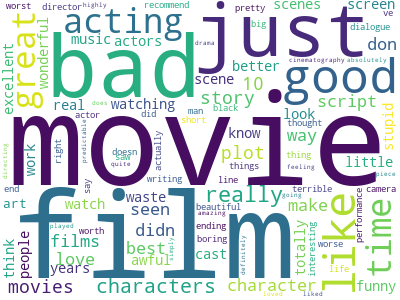

In [42]:
# 단어 구름 확인
cloud.to_image()

# 4. TF-IDF
- 단어의 빈도를 보정하는 방법 (중요하지 않은, 많이 나오는 단어들이 많음)

In [43]:
# 데이터
df

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [44]:
# 사이킷런 패키지의 TfidfVectorizer 사용
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
tfidf = TfidfVectorizer(max_features=500, stop_words='english')

#결과를 tdm으로 저장
tdm = tfidf.fit_transform(df['review'])

In [49]:
tdm

<748x500 sparse matrix of type '<class 'numpy.float64'>'
	with 3434 stored elements in Compressed Sparse Row format>

단어 빈도순 정렬

In [52]:
# 단어와 tf-idf를 저장
word_count = pd.DataFrame({
    '단어':cv.get_feature_names(),
    'tf-idf':tdm.sum(axis=0).flat
})

In [54]:
# 내림차순으로 정렬하여 사우이 5단어 확인
word_count.sort_values('tf-idf', ascending=False).head()

,단어,tf-idf
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656


### TfidfTransformer
- CountVectorizer로 만든 단어 문서 행렬을 변환하는 방법으로 TF-IDF를 적용할 수도 있다.

In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
# 먼저 CountVectorizer로 단어 문서 행렬을 만든다.

cv = CountVectorizer(max_features=500, stop_words='english')
tdm2 = cv.fit_transform(df['review'])

# 다음으로 TF-IDF를 적용한다.

trans = TfidfTransformer()
tdm3 = trans.fit_transform(tdm2)

# 5. 영어 품사 태깅 & 표제어 추출

In [56]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 5.7 MB/s eta 0:00:00


2022-10-31 03:07:36.630033: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-10-31 03:07:36.630780: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-31 03:07:56.425151: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-10-31 03:07:56.425672: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-31 03:07:56.442515: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-2AS57TU
2022-10-31 03:07:56.443211: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-2AS57TU


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


형태소 분석과 표제어 추출

In [57]:
import spacy

# 영어 모형 불러오기
nlp = spacy.load('en_core_web_sm')

In [58]:
# 영어 텍스트에 모형 적용
text = "Wikipedia is maintained by volunteers."
doc = nlp(text)

In [60]:
for token in doc:
    print(token.text, 
          token.lemma_,  # 표제어
          token.pos_,    # 단어의 품사
          token.tag_,    # 자세한 품사
          token.dep_,    # 문법적 의존 관계
          token.is_stop) # 불용어 여부

Wikipedia Wikipedia PROPN NNP nsubjpass False
is be AUX VBZ auxpass True
maintained maintain VERB VBN ROOT False
by by ADP IN agent True
volunteers volunteer NOUN NNS pobj False
. . PUNCT . punct False


용어

In [61]:
spacy.explain('PROPN')

'proper noun'

명사와 동사의 표제어로 단어 문서 행렬 만들기

In [1]:
# 명사와 동사의 표제어만 추출하는 함수
def extract_nv(text):
    doc = nlp(text)
    words=[]
    for token in doc:
        if token.tag_[0] in 'NV':
            words.append(token.lemma_.lower())
    return words